# Homework 1  (Due: 10/8/2018)

COEN 281, Fall 2018  
Professor Marwah

---

## Problem 1: Exploratory Data Analysis - Census Data

The objective of this problem is to explore the census data set provided (censusData.csv). It contains about 32,000 data points from a census done in the 1990's. There is a mix of discrete and continuous variables. The data has nine attributes (features). The data starts with a header row with names of the nine attributes. Each row has census information about one person. Here is a description of the nine attributes.

age: age of the person  
work: type of employer  
edu: level of education  
marital: marital status  
occupation: type of occupation  
race: person's race  
sex: person's gender  
hrs_per_week: hours worked per week  
income: income earned  

The main objectives of exploratory analyses is to get a sense of what the data looks like; how good is the data quality; explore relationships between variables. You may even have some preconceived notions of how different features look like; you can treat these as hypothesis and then try to figure out from the data if they really hold. E.g., what do you expect the age distribution to be? What do you expect the gender distribution to be? What relationship do you expect between income and gender or race; or between number of work hours and level of education or level of education or gender; are your assumptions supported by data?


a) (5 points) Classify the nine attributes as **one** or **more** (all that apply) of categorical, numeric, nominal, symmetric binary, asymmetric binary, ordinal, interval, and ratio. Provide justification.

**Solution:**<br> 
**1. Age :** numeric (as it is an integer), ratio scaled (as 0 age means nothing i.e, absence of age and also it can be expressed as order of magnitude greater or smaller than that of unit of measure, a 20 year old is double the age of a 10 year old).<br>
**2. Work :** categorical (as it is names of things), nominal(as the order of the values of work does not matter).<br>
**3. Edu :** categorical (as it is names of things), ordinal(as the order of degrees matter for example, Masters is highly ranked that Bachelors degree).<br>
**4. Marital:** categorical (as it is names of things), nominal(as the order of the values of marital does not matter).<br>
**5. Occupation:** categorical (as it is names of things), nominal(as the order of the values of occupation does not matter).<br>
**6. Race:** categorical (as it is names of things), nominal(as the order of the values of race does not matter).<br>
**7. Sex:** categorical (as it is names of things), nominal(as the order of the values of sex does not matter), symmetric binary(as both the outcomes of gender are equally important).<br>
**8. hrs_per_week:** numeric (as it is an integer), ratio scaled (as 0 hrs means nothing i.e, absence of hours).<br>
**9. Income:** Categorical (as it is either >50K or <=50k), nominal(as the order of the values of income does not matter), Asymmetric binary(as both the outcomes of income are not equally important ie, one has higher preference than the other).<br>

b) (10 points) Missing values in the data are marked with "?"  
   (i) Load the data set. For each attribute, compute the percentage missing values.  
   (ii) Plot a histogram for the number of missing values per data point (row). (That is, plot the frequency of points (rows) with 1,2,3,4... missing values)

Here use the pandas package to load the data into a pandas "dataframe".

Precentage of missing values for each attribute is :
age             0.000000
work            5.638647
edu             0.000000
marital         0.000000
occupation      5.660146
race            0.000000
sex             0.000000
hrs_per_week    0.000000
income          0.000000
dtype: float64


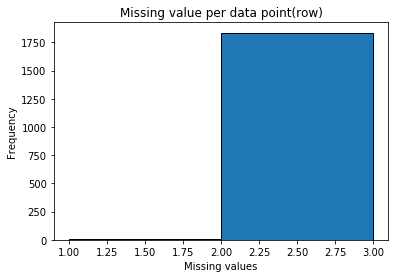

In [6]:
#question b)(i) and (ii)
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('censusData.csv')
data = df.replace('?',np.nan)
frequency = data.isnull().sum(axis=0)
print("Precentage of missing values for each attribute is :")
print(frequency/len(data)*100 )
data_hist = df[(df['work'] == '?') | (df['occupation'] == '?')]
data = data_hist.replace('?', np.nan)
frequency = data.isnull().sum(axis=1)
bins = [1,2,3]
plt.hist(frequency,bins,histtype='bar',ec='black')
plt.xlabel('Missing values')
plt.ylabel('Frequency')
plt.title('Missing value per data point(row)', loc='center')
plt.show()

c) (15 points) Numeric variables  
(i) For each numeric variable, plot a histogram. Also compute their mean and median. What observations can you make from the histograms?  
(ii) For each numeric variable, plot two histograms (on the same scales, so they can be compared) for the two values of income (<= 50K and > 50K). What observations can you make?  
(iii) For each numeric variable, plot two boxplots side-by-side in the same plot for the two values of income. How does this compare with (ii), in terms of the observations you can make?   

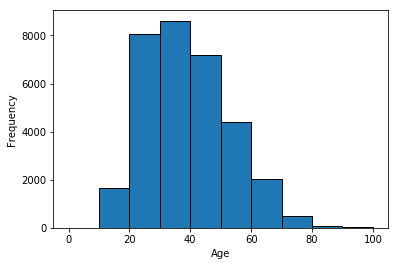

Median = 37.0
Mean = 38.58164675532078


In [7]:
#question c)(i)
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(df['age'],bins,histtype='bar',ec='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print("Median = {}".format(df['age'].median()))
print("Mean = {}".format(df['age'].mean()))

From the histogram we can observe that people in the age range 30-40 are more compared to all other age ranges and the age range 90-100 has the least amount of people in the census data set.
The Avg age (arithmetic mean) of the entire data set is around 38.5

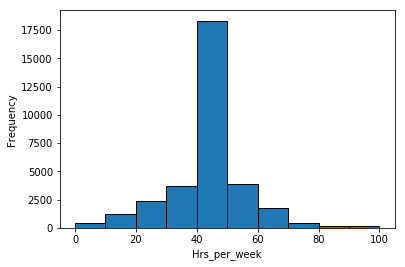

Median = 40.0
Mean = 40.437455852092995


In [8]:
#question c)(i)
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(df['hrs_per_week'],bins,histtype='bar',ec='black')
plt.xlabel('Hrs_per_week')
plt.ylabel('Frequency')
plt.show()
print("Median = {}".format(df['hrs_per_week'].median()))
print("Mean = {}".format(df['hrs_per_week'].mean()))

From the histogram we can observe that the most of the people in the data set are working 40-50 hours per week.
The mean of the enitre data set is around 40.4 hours per week.

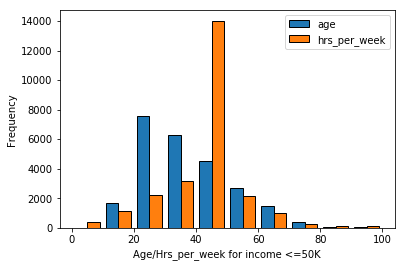

In [9]:
#question c)(ii)
bins = [0,10,20,30,40,50,60,70,80,90,100]
data_hist = df[(df['income'] == '<=50K')]
age = data_hist['age']
hrs_per_week = data_hist['hrs_per_week']
plt.hist([age, hrs_per_week], bins, label=['age', 'hrs_per_week'],ec='black')
plt.xlabel('Age/Hrs_per_week for income <=50K')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

From the histogram we can observe that there are about 14,000 people working between 40-50 hours per week and are earning <=50k
also there are about 8000 people in the age group 20-30 who are earning <=50k. Both the values mentioned above are the higest in there respective category.

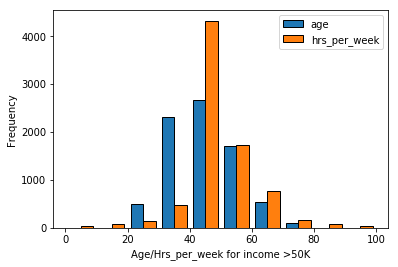

In [10]:
#question c)(ii)
bins = [0,10,20,30,40,50,60,70,80,90,100]
data_hist = df[(df['income'] == '>50K')]
age = data_hist['age']
hrs_per_week = data_hist['hrs_per_week']
plt.hist([age, hrs_per_week], bins, label=['age', 'hrs_per_week'],ec='black')
plt.xlabel('Age/Hrs_per_week for income >50K')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

From the histogram we can observe that there are more that 4,000 people working between 40-50 hours per week and are earning >50k also there are about 2500 people in the age group 40-50 who are earning >50k. Both the values mentioned above are the higest in there respective category.

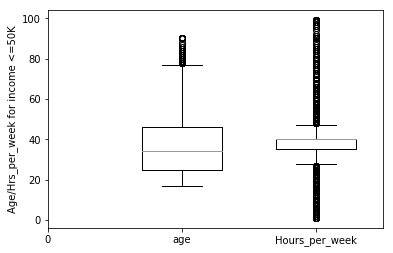

In [11]:
#question c)(iii)
data_box = df[(df['income'] == '<=50K')]
age = data_box['age']
hrs_per_week = data_box['hrs_per_week']
plt.boxplot([age,hrs_per_week], widths = 0.6)
plt.ylabel('Age/Hrs_per_week for income <=50K')
locs, labels = plt.xticks()
plt.xticks(np.arange(3),('0','age','Hours_per_week'))
plt.show()

In comparision with the histogram, box plot conveys the average and the percentile of the data set clearly.The mean represents the 50th percentile of the data set.The box plot starts at the 25th percentile and ends at 75th percentile with mean in the middle. The outliers are indicated by the circular dots present after the wiskers.

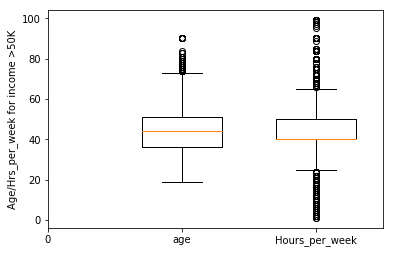

In [12]:
#question c)(iii)
data_box = df[(df['income'] == '>50K')]
age = data_box['age']
hrs_per_week = data_box['hrs_per_week']
plt.boxplot([age,hrs_per_week], widths = 0.6)
plt.ylabel('Age/Hrs_per_week for income >50K')
plt.xticks(np.arange(3),('0','age','Hours_per_week'))
plt.show()

In comparision with the histogram, box plot conveys the average and the percentile of the data set clearly.The mean represents the 50th percentile of the data set.The box plot starts at the 25th percentile and ends at 75th percentile with mean in the middle. The outliers are indicated by the circular dots present after the wiskers.

d) (10 points) Categorical variables  
(i) For each categorical variable, plot a bar plot with frequencies. How many unique values does each variable have?  
(ii) For each categorical variable, plot two bar plots (on the same scale) for the two values of income. What observations can you make from these plots?   

Frequency of each unique values for the work variable :


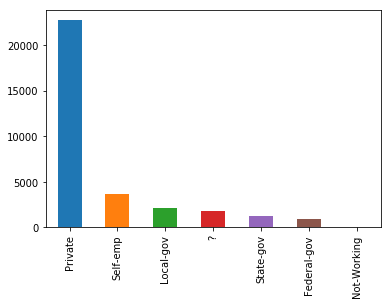

In [13]:
#question d)(i)
work = df['work'].value_counts()
edu =df['edu'].value_counts()
marital = df['marital'].value_counts()
occ = df['occupation'].value_counts()
race = df['race'].value_counts()
sex = df['sex'].value_counts()
income = df['income'].value_counts()
print("Frequency of each unique values for the work variable :")
work.plot.bar()

Varible "work" has 6 unique values : Private, self-emp, local-gov, state-gov, federal-gov and not working. It also has '?' as missing value.

Frequency of each unique values for the Edu variable :


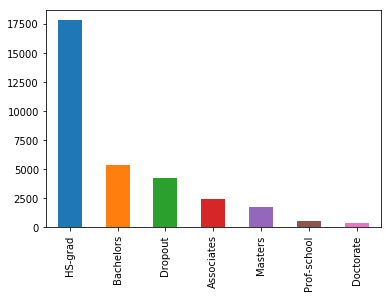

In [14]:
#question d)(i)
print("Frequency of each unique values for the Edu variable :")
edu.plot.bar()

Varible "edu" has 7 unique values HS-grad, Bachelors, dropout, associates, masters, prof-school, doctorate.

Frequency of each unique values for the marital variable :


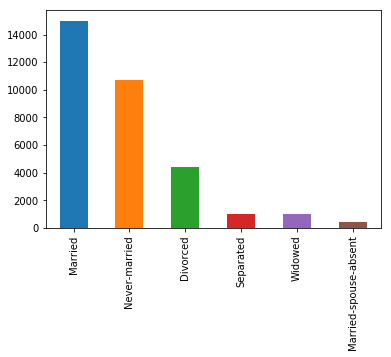

In [15]:
#question d)(i)
print("Frequency of each unique values for the marital variable :")
marital.plot.bar()

Varible "marital" has  6 unique values: Married, never-married, divorced, separated, widowed and married-spouse-absent

Frequency of each unique values for the Occupation variable :


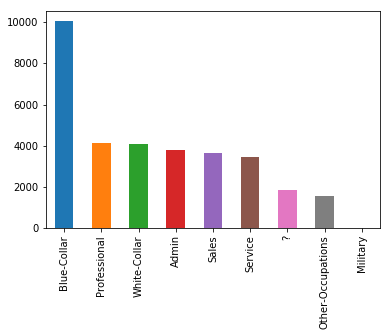

In [16]:
#question d)(i)
print("Frequency of each unique values for the Occupation variable :")
occ.plot.bar()

Varible occupation has 8 unique values: blue-collar, professional, white-collar, admin, sales, service, other-occupations and military. It also has "?" as one of the values(missing values)

Frequency of each unique values for the race variable :


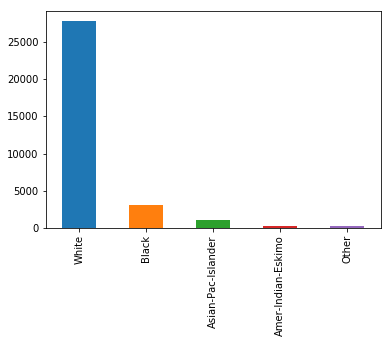

In [17]:
#question d)(i)
print("Frequency of each unique values for the race variable :")
race.plot.bar()

Varible "race" has 5 unique values : White, Black, Asian-pac-Islander, Amer-Indian-Eskimo, other

Frequency of each unique values for the sex variable :


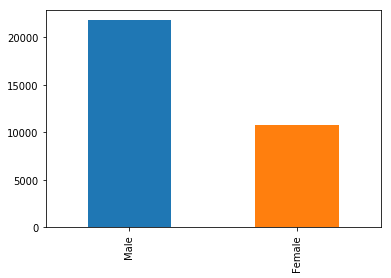

In [18]:
#question d)(i)
print("Frequency of each unique values for the sex variable :")
sex.plot.bar()

Varible "Sex" has 2 unique values :  male and female

Frequency of each unique values for the income variable :


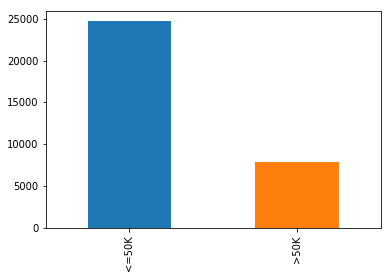

In [19]:
#question d)(i)
print("Frequency of each unique values for the income variable :")
income.plot.bar()

Varibel "income" has 2 unique values : <=50K and >50K

In [20]:
#question d)(ii)
income_greater = df[(df['income'] == '>50K')]
income_lesser = df[(df['income'] == '<=50K')]
work_greater = income_greater['work'].value_counts()
work_lesser = income_lesser['work'].value_counts()
edu_greater = income_greater['edu'].value_counts()
edu_lesser = income_lesser['edu'].value_counts()
marital_greater = income_greater['marital'].value_counts()
marital_lesser = income_lesser['marital'].value_counts()
occ_greater = income_greater['occupation'].value_counts()
occ_lesser = income_lesser['occupation'].value_counts()
race_greater = income_greater['race'].value_counts()
race_lesser = income_lesser['race'].value_counts()
sex_greater = income_greater['sex'].value_counts()
sex_lesser = income_lesser['sex'].value_counts()

Frequency of each unique values for the work variable earning >=50k :


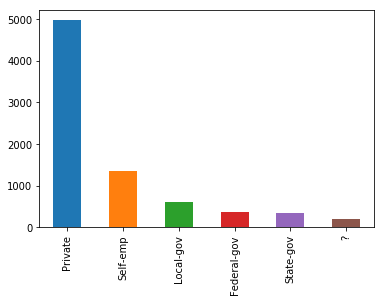

In [21]:
#question d)(ii)
print("Frequency of each unique values for the work variable earning >=50k :")
work_greater.plot.bar()

From the graph we can observe that there are about 5000 Private workers who are earning >=50K and there are very few state-gov workers who earn >=50K

Frequency of each unique values for the work variable earning <50k :


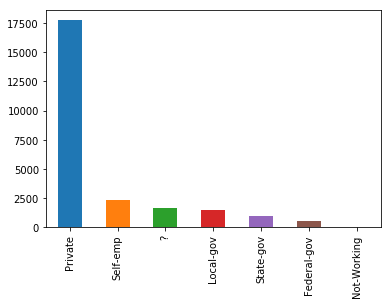

In [22]:
#question d)(ii)
print("Frequency of each unique values for the work variable earning <50k :")
work_lesser.plot.bar()

From the graph we can observe that there are about 17500 Private workers who are earning <50K and there are very few fedral-gov workers who earn <50K

Frequency of each unique values for the edu variable earning >=50k :


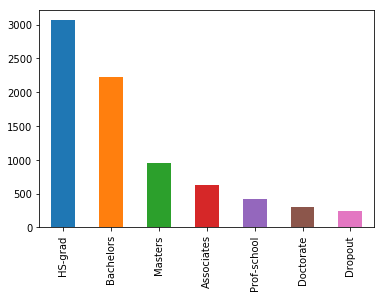

In [23]:
#question d)(ii)
print("Frequency of each unique values for the edu variable earning >=50k :")
edu_greater.plot.bar()

From the graph we can observe that there are 3000 HS-grad who earn >=50k and very few dropout are earning >=50K

Frequency of each unique values for the edu variable earning <50k :


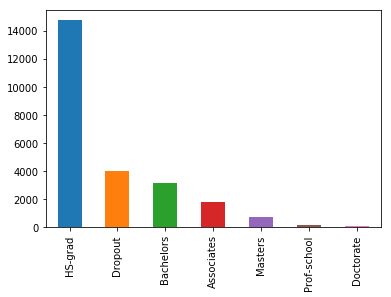

In [24]:
#question d)(ii)
print("Frequency of each unique values for the edu variable earning <50k :")
edu_lesser.plot.bar()

From the graph we can observe that there are 14000 HS-grad who earn <50k and very few Doctorate are earning <50K

Frequency of each unique values for the marital variable earning >=50k :


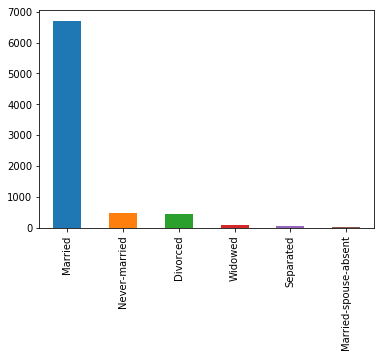

In [25]:
#question d)(ii)
print("Frequency of each unique values for the marital variable earning >=50k :")
marital_greater.plot.bar()

From the graph we can observe that there are 7000 married people who earn >=50k and very few married-spouse-absent are earning >=50K

Frequency of each unique values for the marital variable earning <50k :


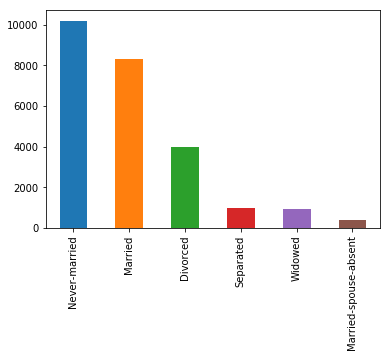

In [26]:
#question d)(ii)
print("Frequency of each unique values for the marital variable earning <50k :")
marital_lesser.plot.bar()

From the graph we can observe that there are 10000 never-married people who earn <50k and very few married-spouse-absent are earning <50K

Frequency of each unique values for the Occupation variable earning >=50k :


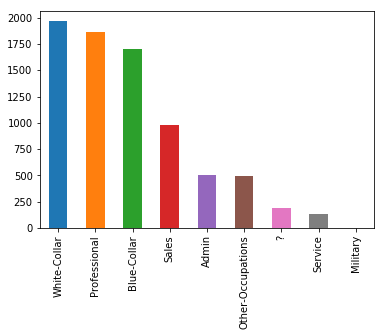

In [27]:
#question d)(ii)
print("Frequency of each unique values for the Occupation variable earning >=50k :")
occ_greater.plot.bar()

From the graph we can observe that there are 2000 white-collar employess who earn >=50k and very few Military personel who are earning >=50K

Frequency of each unique values for the occupation variable earning <50k :


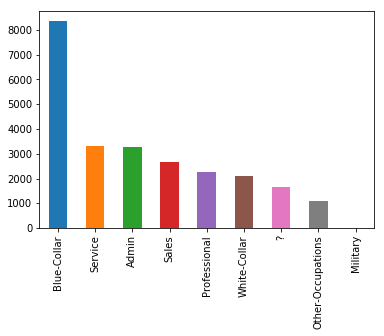

In [28]:
#question d)(ii)
print("Frequency of each unique values for the occupation variable earning <50k :")
occ_lesser.plot.bar()

From the graph we can observe that there are about 8000 blue-collar employess who earn <50k and very few Military personel who are earning <50K. From both the graph we can make out that there are not enough data points availble for "Military" as it is lowest in both the category.

Frequency of each unique values for the race variable earning >=50k :


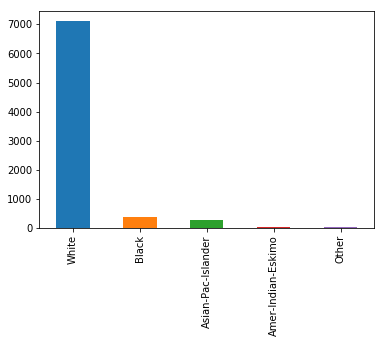

In [29]:
#question d)(ii)
print("Frequency of each unique values for the race variable earning >=50k :")
race_greater.plot.bar()

From the graph we can observe that there are 7000 white people who earn >=50k which is the highest comaped to all the oher races available in the data set.

Frequency of each unique values for the race variable earning <50k :


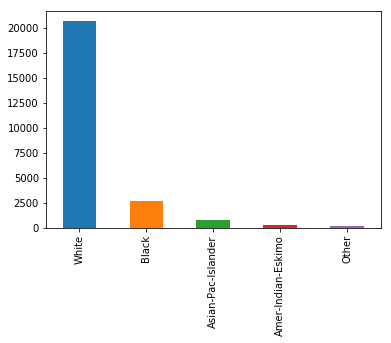

In [30]:
#question d)(ii)
print("Frequency of each unique values for the race variable earning <50k :")
race_lesser.plot.bar()

From the graph we can observe that there are about 20000 white people who earn <50k which is the highest comaped to all the oher races available in the data set. From both the graphs we can also make out the ther are not enough data points available for the other races like black ,asain-pac-islander, amer-indian-eskimo and other.

Frequency of each unique values for the sex variable earning >=50k :


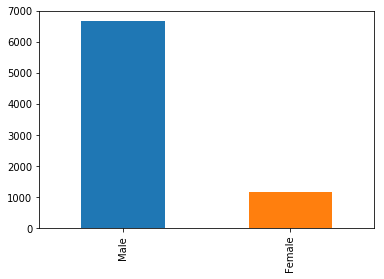

In [31]:
#question d)(ii)
print("Frequency of each unique values for the sex variable earning >=50k :")
sex_greater.plot.bar()

From the graph we can observe that there are 7000 males who earn >=50k and about 1000 females who are earning >=50k

Frequency of each unique values for the sex variable earning <50k :


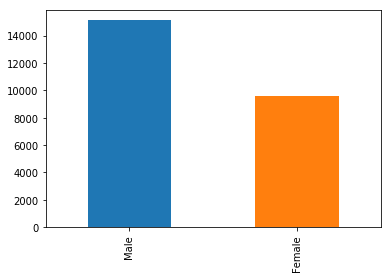

In [32]:
#question d)(ii)
print("Frequency of each unique values for the sex variable earning <50k :")
sex_lesser.plot.bar()

From the graph we can observe that there are about 14000 males who earn <50k and about 9000 females who are earning <50k. There are more number of females earning <50k compared to >=50k

e) (15 points) Relationship between variables  
(i) Plot a scatter plot between "age" and "hrs_per_week". Is there any overplotting? If yes, try to fix it.  Compute the correlation coefficient between these two variables. Based on the plot and the correlation coefficient, comment on the relationship between these two variables.  
(ii) What relationship do you expect between income and number of hours worked? What does the data show?  
(iii) What relationship do you expect between education and number of hours worked? What does the data show?

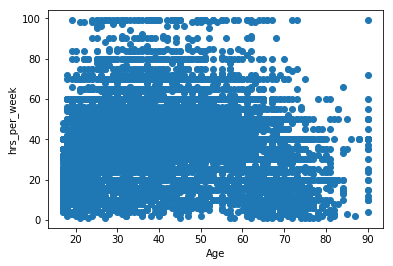

Corelation coefficient = 0.06875359591263824


In [33]:
#question e)(i)
age = df['age']
hours = df['hrs_per_week']
mean_age = age.mean()
mean_hours = hours.mean()
std_age = age.std()
std_hours = hours.std()
plt.scatter(age,hours)
plt.xlabel('Age')
plt.ylabel('hrs_per_week')
plt.show()
corr = ((age * hours).mean() - (mean_age * mean_hours))/(std_age * std_hours)
print("Corelation coefficient = {}".format(corr))

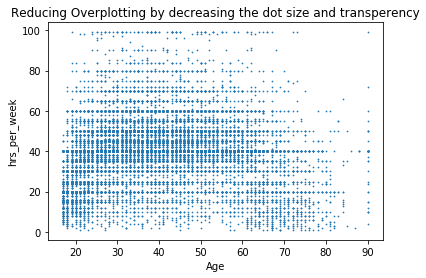

In [34]:
#question e)(i)
age = df['age']
hours = df['hrs_per_week']
plt.scatter(age,hours,s=0.5)
plt.xlabel('Age')
plt.ylabel('hrs_per_week')
plt.title('Reducing Overplotting by decreasing the dot size and transperency', loc='center')
plt.show()

As we can observe from the graph, most of the people in the age group 20-60 are working 20-60 hour/week. Apart from this the graph is pretty scattered and we cannot draw relationships from the data which is also indicated by the corelation coefficient which is around 0. A value of 0 indicates that there is no association between the two variables.

Question e)(ii) Reletionship between income and number of hours worked: We expect that as the number of hours increases the income should also increase proportionately.But the observation from the data set is that eventhough few people are working more hours comapred to others they are drawing less income.Here the income also depends on the type of occupation they are doing.

Question e)(iii)Relation between education and number of hours worked: We expect that there is no relationship between the education and number of hours worked.But from the given data set we can infer that HS-grad, Bachelors and Dropouts work for more hours compared to others.

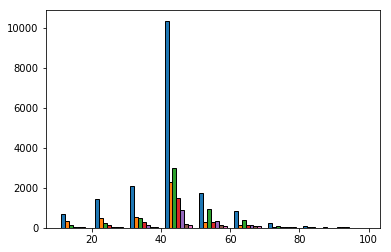

In [35]:
#question e)(iii)
hs_grad_data = df[df['edu'] == 'HS-grad']
hours1 = hs_grad_data['hrs_per_week']
dropout_data = df[df['edu'] == 'Dropout']
hours2 = dropout_data['hrs_per_week']
bachelors_data = df[df['edu'] == 'Bachelors']
hours3 = bachelors_data['hrs_per_week']
associates_data = df[df['edu'] == 'Associates']
hours4 = associates_data['hrs_per_week']
masters_data = df[df['edu'] == 'Masters']
hours5 = masters_data['hrs_per_week']
prof_school_data = df[df['edu'] == 'Prof-school']
hours6 = prof_school_data['hrs_per_week']
doctorate_data = df[df['edu'] == 'Doctorate']
hours7 = doctorate_data['hrs_per_week']
bins=[10,20,30,40,50,60,70,80,90,100]
plt.hist([hours1,hours2,hours3,hours4,hours5,hours6,hours7],bins,ec ='black')
plt.show()

## Problem 2: Kernel Density Estimation

The Resistance is under attack, and in order to be prepared Princess Leia wants to estimate the probability of attack occuring at any hour of a day. She has some past data available on the time of the attacks, however, it is quite meagre. It consists of 25 data points specifying the time an attack occurred (available in the file attacktimes.txt). She calls upon you, her chief data scientist, to help her with the following problems.   

a) (5 points) Plot a histogram of the attacks times




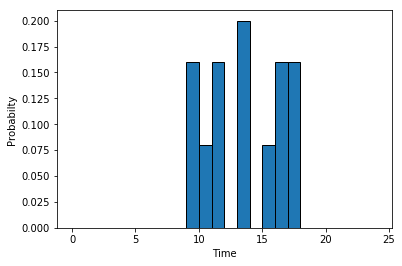

In [36]:
#question 2(a)
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('attacktimes.txt')
data = df.values
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
plt.hist(data,bins,density=True,ec='black')
plt.xlabel('Time')
plt.ylabel('Probabilty')
plt.show()

b) (5 points) From this data, estimate the probability of attack in each hour,$H$, $P_a(H)$



**Solution:**
From the histogram we can infer the following probabilities:<br>
$P_a(1)$ = 0<br>
$P_a(2)$ = 0<br>
$P_a(3)$ = 0<br>
$P_a(4)$ = 0<br>
$P_a(5)$ = 0<br>
$P_a(6)$ = 0<br>
$P_a(7)$ = 0<br>
$P_a(8)$ = 0<br>
$P_a(9)$ = 0<br>
$P_a(10)$ = 0.162<br>
$P_a(11)$ = 0.075<br>
$P_a(12)$ = 0.162<br>
$P_a(13)$ = 0<br>
$P_a(14)$ = 0.2<br>
$P_a(15)$ = 0<br>
$P_a(16)$ = 0.075<br>
$P_a(17)$ = 0.162<br>
$P_a(18)$ = 0.162<br>
$P_a(19)$ = 0<br>
$P_a(20)$ = 0<br>
$P_a(21)$ = 0<br>
$P_a(22)$ = 0<br>
$P_a(23)$ = 0<br>
$P_a(24)$ = 0<br>


c) (25 points) To get better estimates of the probabilities, Princess Leia wants you to smoothen the distribution using kernal density estimation (KDE) with Gaussian kernels. Given n data points, $x_0, x_1, ..., x_{n-1}$, KDE defines the smoothened probability density function as:

$$f(x_i) = \frac{1}{nh} \sum_{j=0}^{n-1} K(\frac{x_i - x_j}{h})$$

where $K$ is the kernel function. The Gaussian kernel function has the form:

$$ K(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}} $$

That is, a Gaussian distribution, with mean at that point and a standard deviation of h, is assumed for each point; the smoothen distribution is the average of the Gaussians corresponding to all the points.

Compute the KDE for the above 25 points based on the above definition, and plot it together with the histogram. In general, it is hard to pick the best value of the bandwidth, h. To select a value here, try a few values and pick the one that visually looks the best, that is, the resulting distribution is not too spikey or too smooth. (Later in the Quarter, we will learn about cross-validation, which could be used to select bandwidth).


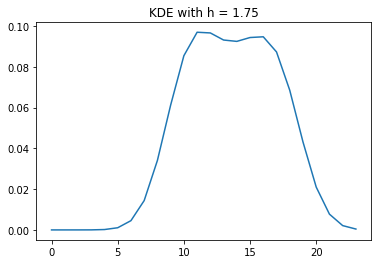

In [37]:
#question 2(b)
import numpy as np
data = df['# Times(Hrs)'].tolist()
result = []
h=1.75
size = len(data)
def kde(data_point):
    kernel = 0
    for item in data:
        diff = (data_point - item)/h
        kernel = kernel + gaussian(abs(diff))
    return 1 * kernel / (size * h)
        
def gaussian(value):
    num1 = np.exp(-(value*value)/2)
    num2 = np.sqrt(2*np.pi)
    return (1 * num1)/num2

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

for i in range(0,24):
    res = kde(i)
    result.append(res)

plt.title('KDE with h = 1.75', loc='center')
plt.plot(result)
plt.show()


d) (15 points) Using the KDE estimate, re-estimate the probability of attack for each hour, $P_a(H)$.

In [38]:
#question 2(c)
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
for hour in range(0,24):
    if hour == 24:
        break
    start_interval = hour
    end_interval = hour + 1    
    div = 100    
    step = (end_interval - start_interval) / (div - 1)  
    y = np.linspace(start_interval, end_interval, div)[:, np.newaxis]
    kd_vals = kde(y)
    probability = np.sum(kd_vals * step)  
    print("Probabilty of attack happening in hours {} to {} is {}".format(hour,hour+1,round(probability,4)))

Probabilty of attack happening in hours 0 to 1 is 0.0
Probabilty of attack happening in hours 1 to 2 is 0.0
Probabilty of attack happening in hours 2 to 3 is 0.0
Probabilty of attack happening in hours 3 to 4 is 0.0001
Probabilty of attack happening in hours 4 to 5 is 0.0005
Probabilty of attack happening in hours 5 to 6 is 0.0025
Probabilty of attack happening in hours 6 to 7 is 0.0088
Probabilty of attack happening in hours 7 to 8 is 0.0236
Probabilty of attack happening in hours 8 to 9 is 0.0479
Probabilty of attack happening in hours 9 to 10 is 0.0749
Probabilty of attack happening in hours 10 to 11 is 0.0934
Probabilty of attack happening in hours 11 to 12 is 0.0985
Probabilty of attack happening in hours 12 to 13 is 0.0958
Probabilty of attack happening in hours 13 to 14 is 0.0935
Probabilty of attack happening in hours 14 to 15 is 0.0943
Probabilty of attack happening in hours 15 to 16 is 0.0959
Probabilty of attack happening in hours 16 to 17 is 0.0929
Probabilty of attack happ